# <center>Numerical Analysis Project</center>

<center> <font size="4"> Giuseppe Cogata, Amine Lamouchi  </font><center>

In [2]:
## loading python libraries

# necessary to display plots inline:
%matplotlib inline   

# load the libraries
import matplotlib.pyplot as plt # 2D plotting library
import numpy as np # package for scientific computing
from math import * # package for mathematics (pi, arctan, sqrt, factorial ...)
from scipy import fftpack # used for Discrete Cosine Transforms
from scipy import integrate # used for numerical integration

# Introduction

In this notebook, we will study two methods of approximating $2\pi$-periodic functions by trigonometric polynomials. Firstly, we will look at Fourier Series, test their effectiveness with different functions and draw conclusions regarding their convergence. We will also mention a limitation of Fourier Series, namely the Gibbs Phenomenon, and study its behaviour.

Secondly, we will use trigonometric interpolation to provide another way of approximating these functions. To this aim, we will implement three different methods to derive the interpolation polynomial and compare their efficiency.

# Fourier Series

In this section, we will use Fourier Series to approximate $2\pi$-periodic functions by trigonometric polynomials.
In particular, for a function $f: \mathbb{R} \to \mathbb{R}$, its fourier series is defined as:
$$
S(f) = a_0(f) + 2\sum_{n = 1}^{\infty}(a_n(f)\cos(nx) + b_n(f)\sin(nx))
$$
where:
$$
a_n(f) = \frac{1}{2\pi} \int_{-\pi}^{\pi} f(x)\cos(nx) \, dx \quad \text{and} \quad b_n(f) = \frac{1}{2\pi} \int_{-\pi}^{\pi} f(x)\sin(nx) \, dx
$$
for all $n \geq 0$. We call these the Fourier Coefficients of $f$.

We focus our study on even functions. Hence, as $x \mapsto f(x)\sin(nx)$ will be odd, then its integral centered
at 0 will cancel, so that $b_n(f) = 0$.

Let now $N \geq 2$, and define:
$$
S_N(f) = a_0(f) + 2\sum_{n = 1}^{N - 1}a_n(f)\cos(nx)
$$
This is known as a truncated Fourier Series. We will now conduct some numerical symulations to compute these
truncated series for different functions. We will also study how close the truncated series is to the actual
function for varying values of $N$. We will use the function scipy.integrate.quad to compute the Fourier
coefficients by approximating them using quadrature rules.

In [3]:
def CoeffsFourier(f, N):
    """
    First N Fourier coefficients for function f
    -------------------------------------------
    Inputs :
    f: function to be approximated
    N: index of truncation (integer >= 2)
    
    Output :
    af, bf : a tuple of arrays containing the first N Fourier coefficients of f    
    
    Remark:
    We compute the Fourier coefficients using the method 
    integrate.quad from python's scipy library.
    """
    af = np.zeros(N) # initialise the array
    
    bf = np.zeros(N) # initialise the array
    
    for n in range(N):
        
        fcosn = lambda x: f(x)*np.cos(n*x)
        
        integral_1 = integrate.quad(fcosn, -pi, pi)[0] # Fourier coefficient at step n
        
        af[n] = integral_1/(2*pi) # store the Fourier coefficient in the array
        
        fsinn = lambda x: f(x)*np.sin(n*x)
        
        integral_2 = integrate.quad(fsinn, -pi, pi)[0] # Fourier coefficient at step n
        
        bf[n] = integral_2/(2*pi) # store the Fourier coefficient in the array
        
    return (af, bf)

In [4]:
def TruncatedFourier(f, N, x):
    """
    Truncated Fourier series of f at order N computed at x
    ----------------------------------------------------------
    Inputs :
    f: function to be approximated
    N: index of truncation (integer >= 2)
    x: value at which we evaluate the truncated Fourier series
    
    Output :
    SNf: value of SN(f)(x)
    """
    af, bf = CoeffsFourier(f, N) # compute the N first Fourier coefficients
    
    SNf = af[0] # intialise SNf
        
    for n in range(1, N):
            
        SNf = SNf + 2*(af[n]*np.cos(n*x) + bf[n]*np.sin(n*x)) # compute the sum defined in SNf
        
    return SNf

Since we want to study how the truncated Series differs from the function, we will do so by studying the global error between the two. For $f: [-\pi, \pi] \to \mathbb{R}$, we define it as:

$$ \sup_{x \in [-\pi, \pi]} |S_N(f)(x) - f(x)| $$

Howeve, in practice, it is difficult to calculate this value exactly. Hence, we will approximate this error by:

$$ \max_{i \in I} |S_N(f)(X_i) - f(X_i)| $$

where $(X_i)_{i \in I}$ is a discretisation of $[-\pi, \pi]$.

In [5]:
def FourierErr(f, Nmax, X):
    """
    Global error resulting from the Truncated Fourier approximation
    ---------------------------------------------------------------
    Inputs :
    f: function to be approximated
    Nmax: maximal index of truncation (integer >= 2)
    X: array discretising the interval over-which we approximate f by S(f)
    
    Output :
    tab_err: array containing the error of the approximation at different
    indices of truncation N ranging from 2 to Nmax
    """
    tab_err = np.zeros(Nmax+1) # initialise tab_err
    
    for N in range(2, Nmax+1):
        
        SNf = TruncatedFourier(f, N, X) # compute the Truncated Fourier series until step N
        
        tab_err[N] = max(np.abs(SNf - np.array([f(x) for x in X]))) # compute the error at step N
        
    return tab_err[2:]

First, using the two functions defined above, we will stdy the truncated Fourier series for $f(x) = 1 - \frac{2|x|}{\pi}$.

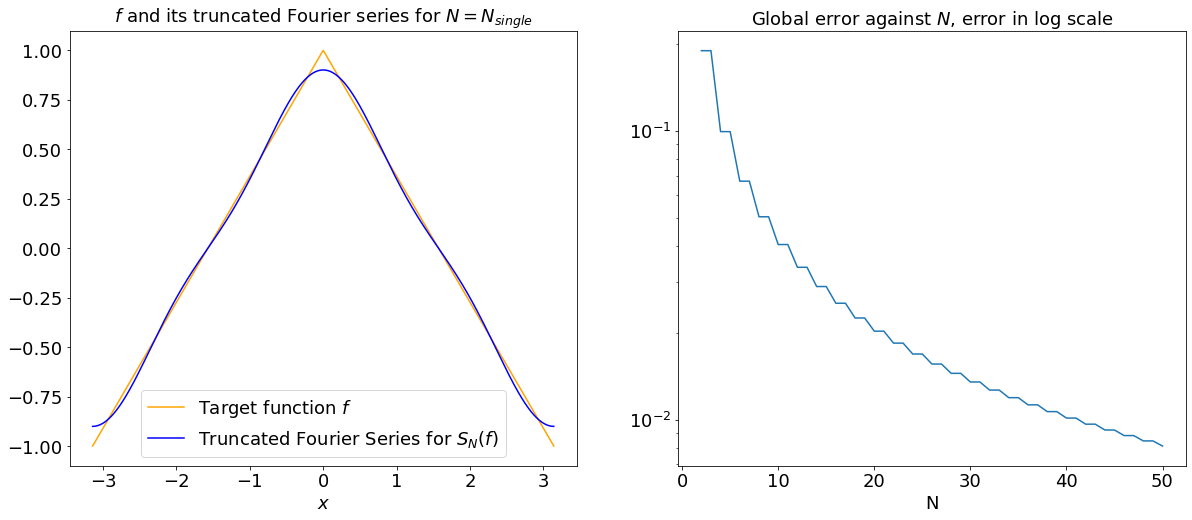

In [6]:
def f(x): # define the function f
    
    return 1 - 2*np.abs(x)/np.pi

Nmax = 50 # maximum index of truncation, used to compute the global error

Nsingle = 5 # a fixed index of truncation, used to visualize f and its Fourier approx. at N = Nsingle

tab_N = np.arange(2, Nmax+1) # array containing the truncation indices at which we compute the Fourier approx.

X = np.linspace(-np.pi, np.pi, 1000) # discretisation of the interval [-pi, pi]

SNf = TruncatedFourier(f, Nsingle, X) # truncated Fourier series of f with N = Nsingle

tab_err = FourierErr(f, Nmax, X) # array containing the global error at each N from 2 to Nmax

#plots
plt.figure(figsize=(20, 8))
    
plt.subplot(121)
plt.plot(X, f(X), color='orange', label = 'Target function $f$')
plt.plot(X, SNf, color = 'blue', label = 'Truncated Fourier Series for $S_N(f)$')
plt.legend(fontsize = 18)
plt.xlabel('$x$', fontsize = 18)
plt.tick_params(labelsize=18)
plt.title('$f$ and its truncated Fourier series for $N = N_{single}$', fontsize = 18)

plt.subplot(122)
plt.plot(tab_N, tab_err, label = 'Global error')
plt.xlabel('N', fontsize = 18)
plt.tick_params(labelsize=18)
plt.yscale('log')
plt.title('Global error against $N$, error in log scale', fontsize = 18)
 
plt.show()

As we can see, it seems that the truncated Fourier Series provides a consistent approximation of $f$, especially for large values of $N$. In particular, we can observe that $S_N(f)$ approximates $f$ very well already for $N = 10$. Furthermore, the global interpolation error between $S_N(f)$ and $f$ seems to go to $0$ as $N$ increases.

We now perform the same analysis for the function $\displaystyle{g(x) = \begin{cases} 1 \; \text{if} \; x \in [-\frac{\pi}{2}, \frac{\pi}{2}]\\ -1 \; \text{otherwise} \end{cases}}$.

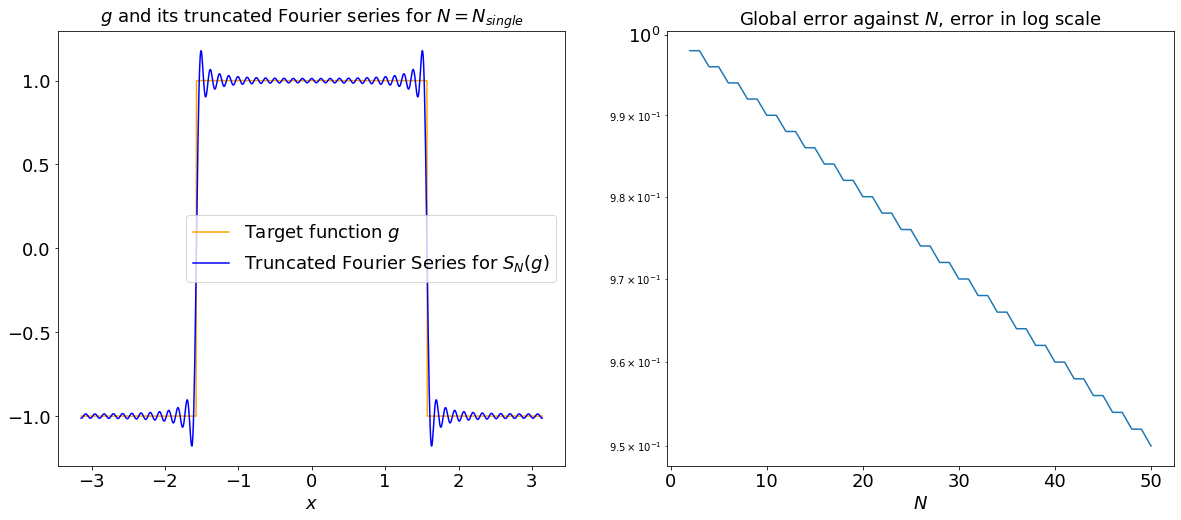

In [7]:
def g(x): # define the function g
    """
    return 1 if x in [-pi/2, pi/2] and -1 else.
    """
    if x >= -pi/2 and x <= pi/2:
        
        return 1
    
    else:
        
        return -1

Nmax = 50 # maximum index of truncation, used to compute the global error

Nsingle = 50 # a fixed order of truncation, used to visualize g and its Fourier approx. at N = Nsingle

tab_N = np.arange(2, Nmax+1) # array containing the truncation indices at which we compute the Fourier approx.

X = np.linspace(-np.pi, np.pi, 1000) # discretisation of the interval of definition of g

SNg = TruncatedFourier(g, Nsingle, X) # truncated Fourier approximation of g with N = Nsingle

tab_err = FourierErr(g, Nmax, X) # array containing the global error at each N from 2 to Nmax

#plots
plt.figure(figsize=(20, 8))
    
plt.subplot(121)
plt.plot(X, [g(x) for x in X], color='orange', label = 'Target function $g$')
plt.plot(X, SNg, color = 'blue', label = 'Truncated Fourier Series for $S_N(g)$')
plt.legend(fontsize = 18)
plt.xlabel('$x$', fontsize = 18)
plt.tick_params(labelsize=18)
plt.title('$g$ and its truncated Fourier series for $N = N_{single}$', fontsize = 18)

plt.subplot(122)
plt.plot(tab_N, tab_err, label = 'Global error')
plt.xlabel('$N$', fontsize = 18)
plt.tick_params(labelsize=18)
plt.yscale('log')
plt.title('Global error against $N$, error in log scale', fontsize = 18)

plt.show()

This approximation also seems to work well in the case of $g$. However, we can see that $S_N(g)$ continues to show small oscillations, even for $N = 50$. In particular, we can notice that these are significantly larger at the points wehere $g$ is discontinuous. This is the result of the Gibbs phenomenon, which we will study more in detail later in the notebook.

Finally, we study the function $h(x) = \cos x$.

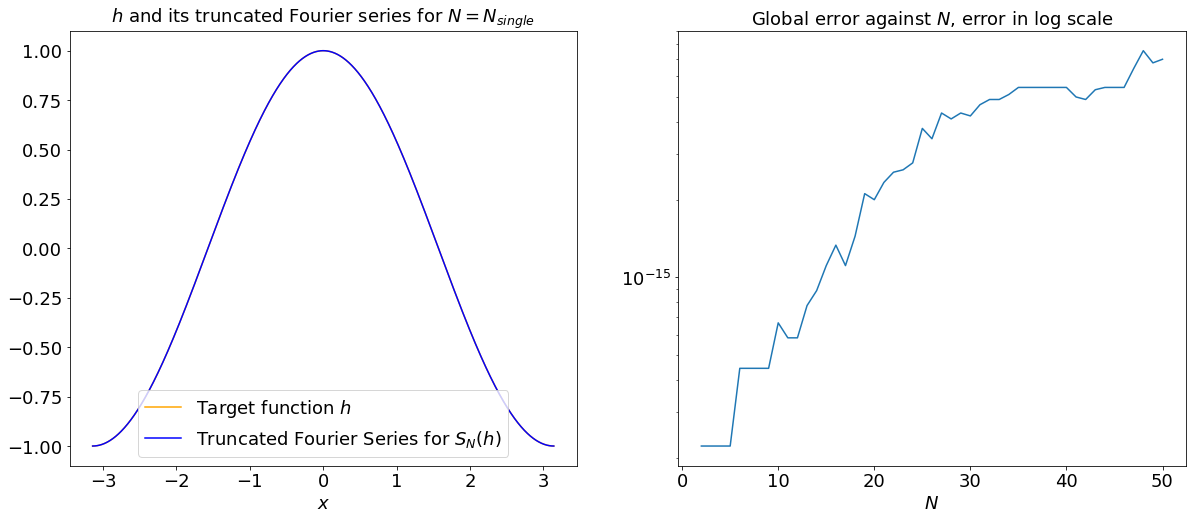

In [8]:
def h(x): # define the function h
    
    return np.cos(x)

Nmax = 50 # maximum index of truncation, used to compute the global error

Nsingle = 5 # a fixed order of truncation, used to visualize h and its Fourier approx. at N = Nsingle

tab_N = np.arange(2, Nmax+1) # array containing the truncation indices at which we compute the Fourier approx.

X = np.linspace(-np.pi, np.pi, 1000) # discretisation of the interval of definition of h

SNh = TruncatedFourier(h, Nsingle, X) # truncated Fourier approximation of h with N = Nsingle

tab_err = FourierErr(h, Nmax, X) # array containing the global error at each N from 2 to Nmax

#plots
plt.figure(figsize=(20, 8))
    
plt.subplot(121)
plt.plot(X, h(X), color='orange', label = 'Target function $h$')
plt.plot(X, SNh, color = 'blue', label = 'Truncated Fourier Series for $S_N(h)$')
plt.legend(fontsize = 18)
plt.xlabel('$x$', fontsize = 18)
plt.tick_params(labelsize=18)
plt.title('$h$ and its truncated Fourier series for $N = N_{single}$', fontsize = 18)

plt.subplot(122)
plt.plot(tab_N, tab_err, label = 'Global error')
plt.xlabel('$N$', fontsize = 18)
plt.tick_params(labelsize=18)
plt.yscale('log')
plt.title('Global error against $N$, error in log scale', fontsize = 18)
 
plt.show()

The case of $h$ is slightly different. Obviously, being that $x \mapsto \cos x$ is a trigonometric funtion, it is easily approximated by trigonometric polynomials. In fact, we can see that $S_N(h) \approx h$ for all $N \geq 2$. However, we can also observe that, while it always remain around $10^{-15}$, the global error increases with $N$ in an erratic manner. This is likely due to rounding errors in the machine.

Now that we have numerically observed that truncated Fourier series provide approximations of the studied functions, we would like to know when we can use this approximation. The Dirichilet theorem provides sufficient conditions for this convergence. In particular, the theorem states that, if $f: D \to \mathbb{R}$ is a $2\pi$-periodic function such that:

- $\displaystyle{\int_{-\pi}^{\pi} |f(x)| \, dx}$ is finite

- $f$ has a finite, non-zero number of maximum and minimum values

- $f$ has a finite number of discontinuities

then, for all $x_0 \in D$, we will have that:

$$ S(f)(x_0) = \frac{1}{2}\left(\lim_{x \to x_0^+} f(x) + \lim_{x \to x_0^-} f(x) \right) $$

Hence, wherever $f$ is continuous, this theorem proves that $S(f)(x) = f(x)$. However, if there are any discontinuities, the series will converge to the average of the limit at the extremities of said discontinuity.

## Decay of the Error and Fourier Coefficients

The fact that a function's truncated Fourier Series can approximate a function obviously implies that the error of the estimation goes to zero. A natural question to ask is how this is related to the Fourier coefficients that determine how we make this approximation.

In fact, it can be shown that $\displaystyle{\lim_{n \to \infty} a_n(f) = 0}$ for any integrable function $f$. In this section, we will study the convergence of Fourier coefficients and the global error in the approximation, linking their rate of decay and similarity to the regularity of the function $f$ being approximated.

Now we will attempt to formulate upper bounds for the decay of these sequences and relate their order of convergence with the regularity of the functions studied. Firstly, we will test the function $f_\alpha : [-\pi, \pi] \to \mathbb{R}$ defined as $f_\alpha(x) = |x|^\alpha$ for different $\alpha \in (0, 1)$.

for both $c_2 \in \mathcal{C}^2([-\pi, \pi])$ and $c_{\infty} \in \mathcal{C}^{\infty}([-\pi, \pi])$. Furthermore, we can see that, in the case of $c_0$, the shape of the decay of these two sequences is very similar, but the Fourier coefficients seem to converge to $0$ faster. However, for the case of $c_{\infty}$, we observe that the two sequences are practically identichal (until rounding errors kick in). This suggest that, the more regular the function, the more similar the decay of these two sequences is. Furthermore, we can observe that both the coefficients and the error converge much faster in the case of $c_{\infty}$ than in the case of $c_2$. This sugests that, for a function $f \in \mathcal{C}^p$ with $p \in \mathbb{Z}$, then the Fourier coefficients will decay significantly faster than the error, whereas in the case of a $\mathcal{C}^{\infty}$ function, they behave in essentially the same manner.

Now, we will attempt to formulate upper bounds for the decay of these sequences and relate their order of convergence  witrh the regularity of the functions studied. Firstly, we will test the function $f_{\alpha}: [-\pi, \pi] \to \mathbb{R}$ defined as $f_{\alpha}(x) = |x|^{\alpha}$ for different $\alpha \in (0, 1)$.

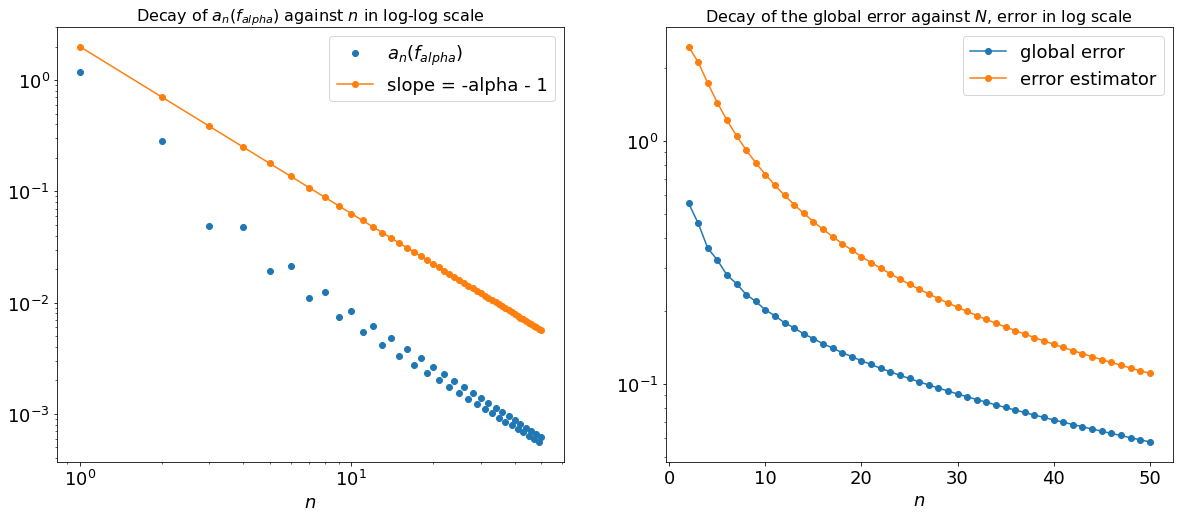

In [18]:
alpha = 1/2 # we fix the parameter alpha

def f_alpha(x): # we define the function f_alpha
    
    return np.abs(x)**alpha

Nmax = 50 # maximum index of truncation

nmax = 50 # maximum index of the fourier coefficients

tab_n = np.arange(1, nmax + 1) # indices of the Fourier coefficients

tab_N = np.arange(2, Nmax + 1) # indices of truncation

X = np.linspace(-pi, pi, 1000) # discretization of the interval [-pi, pi]

coeffs_alpha = CoeffsFourier(f_alpha, nmax) # compute the first nmax Fourier coefficients

estimator_alpha = 2*(1/tab_n)**(alpha+1) # upper bound of the fourier coefficients

err_estimator = 10*np.log(tab_N)/(tab_N**(alpha+1)) # upper bound of the global error

err = FourierErr(f_alpha, Nmax, X) # compute the global error of the approximation

plt.figure(figsize=(20, 8))

plt.subplot(121)
plt.loglog(tab_n, abs(coeffs_alpha[0]), marker = 'o', label = '$a_n(f_{alpha})$', linestyle='')
plt.loglog(tab_n, estimator_alpha, marker = 'o', label = 'slope = -alpha - 1')
plt.xlabel('$n$', fontsize = 18)
plt.tick_params(labelsize=18)
plt.legend(fontsize = 18)
plt.title('Decay of $a_n(f_{alpha})$ against $n$ in log-log scale', fontsize = 16)

plt.subplot(122)
plt.plot(tab_N, err, marker='o', label = 'global error')
plt.plot(tab_N, err_estimator, marker='o', label = 'error estimator')
plt.xlabel('$n$', fontsize = 18)
plt.tick_params(labelsize=18)
plt.legend(fontsize = 18)
plt.yscale('log')
plt.title('Decay of the global error against $N$, error in log scale', fontsize = 16)
plt.show()

As we can see, the sequences $(a_n)_{n = 0}^{\infty}$ and $(\max_{i \in I}(|S_N(f)(X_i) - f(X_i)|)_{N = 2}^{\infty}$ both seem to converge to $0$, as expected. Furthermore, we notice that, for all $\alpha \in (0, 1)$, we have that:

$$ |a_n(f_{\alpha})| \leq \frac{K_1}{n^{\alpha + 1}} \; \forall n \in \mathbb{N} \quad \text{and} \quad \left|\max_{i \in I}(S_N(f_{\alpha})(X_i) - f(X_i))\right| \leq \frac{K_2\ln N}{N^{\alpha + 1}} \; \forall N \geq 2 $$

with $K_1, K_2 \in \mathbb{R}^+$.

We can notice that, for all $\alpha \in (0, 1)$, $f_{\alpha}$ is $\alpha$-Hölder continuous. We say that a function $f: D \to \mathbb{R}$ is $\alpha$-Hölder continuous if there exists $C > 0$ such that, for all $x, y \in D$:

$$ |f(x) - f(y)| \leq C|x - y|^{\alpha}$$

In fact, there is a theorem that states that, if a function $f: D \to \mathbb{R}$ is an even, $\alpha$-Hölder continuous function (with $\alpha \in (0, 1)$), then it's Fourier series converges uniformly to the function and, for all $n \in \mathbb{N}$ and $N \geq 2$:

$$ |a_n(f)| \leq \frac{K_1}{n^{\alpha}} \quad \text{and} \quad |S_N(f)(x) - f(x))| \leq \frac{K_2\ln N}{N^{\alpha}} \; \forall x \in D$$

where $K_1, K_2 \in \mathbb{R}^+$. In the case of $f_{\alpha}$, we found that in fact the functions have a better upper bound, but this is not necessarily always the case.

We now propose a new study for the convergence of the Fourier coefficients relying on a different form of regularity: the function's differentiability. Let $f$ be a $2\pi$-periodic integrable function. Then, if:

- $f \in \mathcal{C}^{k - 1}$ for some $k \geq 1$

- $f^{(i)}$ is periodic for all $1 \leq i \leq k - 1$

- $f^{(k)}$ has a finite, non-zero number of jump discontinuities

then, for all $n \in \mathbb{N}$:

$$ |a_n(f)| \leq \frac{C_1}{n^k} \quad \text{and} \quad |b_n(f)| \leq \frac{C_2}{n^k} $$

for some constants $C_1, C_2 > 0$.

We will now test this for the function $f$ as defined previously, for which $k = 1$. Furthermore, we test this theorem for the functions $k_1$, $k_3$ and $k_5$ defined by $k_1(x) = 3\arcsin(\sin(x))$, $k_2(x) = x(\pi - |x|)$ and $k_5(x) = |\sin x|^5$. We can verify that $k = 1$ for $k_1$,  $k = 2$ for $k_2$ and $k = 5$ in the case of $k_5$.

Since among these functions, only $k_1$ and $k_3$ are odd, we will plot $b_n(k_1)$ and $b_n(k_3)$ instead of $a_n(k_1)$ and $a_n(k_3)$.

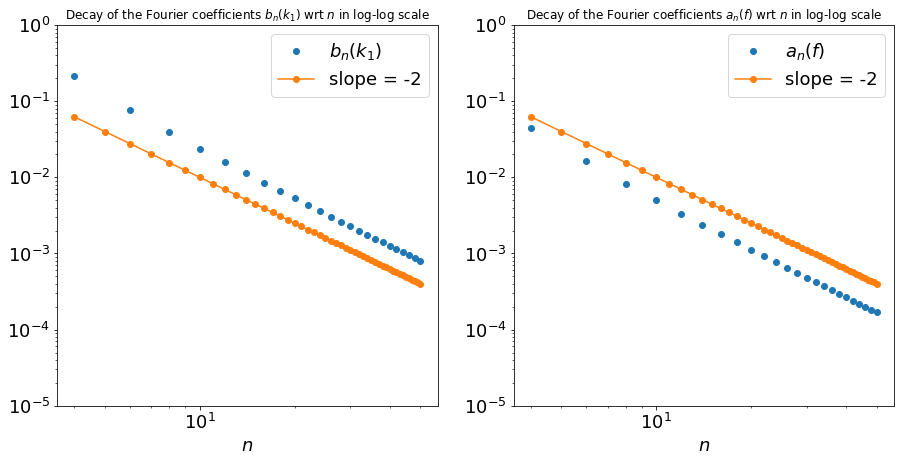

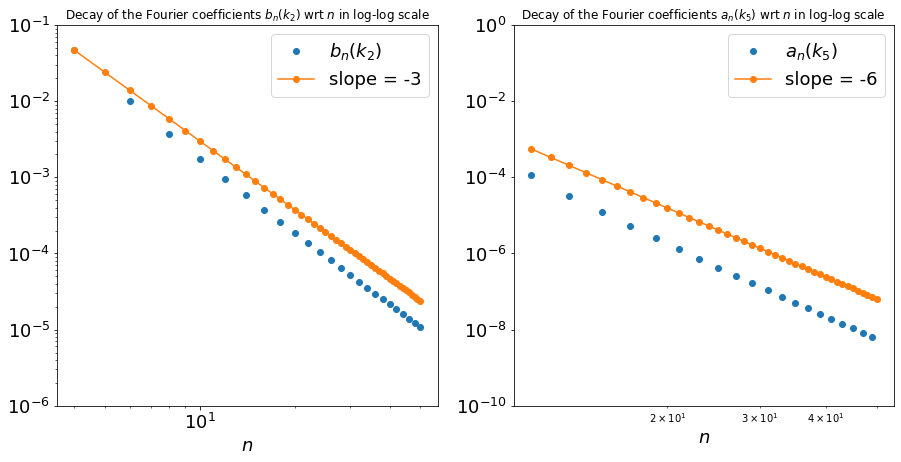

In [19]:
def k1(x): # define the function k1
    
    return 3*np.arcsin(np.sin(x))

def k2(x): # define the function k3
    
    return x*(pi-np.abs(x))

def k5(x): # define the function k6
    
    return np.abs(sin(x))**5

Nmax = 50 # maximum index of truncation

nmax = 50 # maximum index of the Fourier Coefficients

tab_n = np.arange(1, nmax + 1) # indices of the Fourier Coefficients

tab_N = np.arange(2, Nmax + 1) # indices of truncation

X = np.linspace(-pi, pi, 1000) # discretization of the interval [-pi, pi]

# compute the first nmax Fourier Coefficients for each function

coeffs_f = CoeffsFourier(f, nmax) 

coeffs_k1 = CoeffsFourier(k1, nmax)

coeffs_k2 = CoeffsFourier(k2, nmax)

coeffs_k5 = CoeffsFourier(k5, nmax)

# compute the error estimators of the Fourier Coefficients for each function

estimator_k5 = 1000*(1/tab_n)**6

estimator_k2 = 3*(1/tab_n)**3

estimator_k1 = (1/tab_n)**2

estimator_f = (1/tab_n)**2

#plots

plt.figure(figsize=(15, 7))

plt.subplot(121)
plt.loglog(tab_n[3:], abs(coeffs_k1[1][3:]), marker = 'o', label = '$b_n(k_1)$', linestyle='')
plt.loglog(tab_n[3:], estimator_k1[3:], marker = 'o', label = 'slope = -2')
plt.xlabel('$n$', fontsize = 18)
plt.ylim(1e-5,1)
plt.tick_params(labelsize=18)
plt.legend(fontsize = 18)
plt.title('Decay of the Fourier coefficients $b_n(k_1)$ wrt $n$ in log-log scale', fontsize=12)

plt.subplot(122)
plt.loglog(tab_n[3:], abs(coeffs_f[0][3:]), marker = 'o', label = '$a_n(f)$', linestyle='')
plt.loglog(tab_n[3:], estimator_f[3:], marker = 'o', label = 'slope = -2')
plt.xlabel('$n$', fontsize = 18)
plt.ylim(1e-5,1)
plt.tick_params(labelsize=18)
plt.legend(fontsize = 18)
plt.title('Decay of the Fourier coefficients $a_n(f)$ wrt $n$ in log-log scale', fontsize=12)

plt.figure(figsize=(15, 7))

plt.subplot(121)
plt.loglog(tab_n[3:], abs(coeffs_k2[1][3:]), marker = 'o', label = '$b_n(k_2)$', linestyle='')
plt.loglog(tab_n[3:], estimator_k2[3:], marker = 'o', label = 'slope = -3')
plt.xlabel('$n$', fontsize = 18)
plt.ylim(1e-6,1e-1)
plt.tick_params(labelsize=18)
plt.legend(fontsize = 18)
plt.title('Decay of the Fourier coefficients $b_n(k_2)$ wrt $n$ in log-log scale', fontsize=12)

plt.subplot(122)
plt.loglog(tab_n[10:], abs(coeffs_k5[0][10:]), marker = 'o', label = '$a_n(k_5)$', linestyle='')
plt.loglog(tab_n[10:], estimator_k5[10:], marker = 'o', label = 'slope = -6')
plt.xlabel('$n$', fontsize = 18)
plt.ylim(1e-10,1)
plt.tick_params(labelsize=18)
plt.legend(fontsize = 18)
plt.title('Decay of the Fourier coefficients $a_n(k_5)$ wrt $n$ in log-log scale', fontsize=12)

plt.show()

Notice that, once again, we observe that the coefficients converge even faster than the theorem suggests. In conclusion, thanks to the previous observations, we can give a rate of convergence of the Fourier coefficients and provide an effective upper bound for the global interpolation error. Furthermore, this analysis leads us to conclude that, the smoother the function, the faster its Fourier coefficients go to $0$ and, in some cases, the faster the convergence of the error.


We now want to make a link between the decay of the Fourier coefficients and the global error in the approximation Let $f: D \to \mathbb{R}$ be an even, $2\pi$-periodic function satisfying the Dirichlet conditions. Hence is, for all $x \in D$:

$$ f(x) = S(f)(x) = a_0(f) + 2\sum_{n = 1}^{\infty} a_n(f)\cos(nx)$$

Then, fix $N \geq 2$ and consider $S_N(f)$ the truncated Fourier Series of $f$. Given $x \in D$, we have that, by the Triangle inequality and the fact that $|\cos(nx)| \leq 1$:

$$
\begin{align*}
    |S_N(f)(x) - f(x)| &= \left| a_0(f) + 2\sum_{n = 1}^{N - 1} a_n(f)\cos(nx) - a_0(f) - 2\sum_{n = 1}^{\infty} a_n(f)\cos(nx)\right|\\
    &= 2\left|\sum_{n = N}^{\infty}a_n(f)\cos(nx)\right|\\
    &\leq 2\sum_{n = N}^{\infty} |a_n(f)||\cos(nx)|\\
    &\leq 2\sum_{n = N}^{\infty} |a_n(f)|
\end{align*}
$$

Since this holds for all $x \in D$, in particular, as $f$ has a finite, non-zero number of maxima:

$$ \max_{i \in I}|S_N(f)(X_i) - f(X_i)| \leq 2\sum_{n = N}^{\infty} |a_n(f)|$$

So, we have obtained a link between the global interpolation error and the Fourier coefficients, as desired. Furthermore, as we know that, the smoother the function, the faster the decay of the Fourier coefficients, this result implies that the same is true for the global error.

We will now plot both the error and the Fourier coefficients, whilist also plotting the series of the Fourier coefficients. Since we cannot plot an infinite series, then, for every $2 \leq N \leq N_{max}$, we will approximate this infinite sum as:

$$ \sum_{n = N}^{\infty} |a_n(f)| \approx \sum_{n = N}^{\lambda N_{max} + N} |a_n(f)| $$

with $\lambda \in \mathbb{R}^+$ large enough. This will allow us to numerically verify the effectiveness of this bound.

We will test the functions $c_2, c_{\infty}: [-\pi, \pi] \to \mathbb{R}$ defined by $c_2(x) = |x^3|$ and $c_{\infty}(x) = e^{\cos x}$. As suggested by their names, we have that $c_2 \in \mathcal{C}^2$ and $c_{\infty} \in \mathcal{C}^{\infty}$.

<ipython-input-3-9e1eb295631e>:24: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral_1 = integrate.quad(fcosn, -pi, pi)[0] # Fourier coefficient at step n
<ipython-input-3-9e1eb295631e>:24: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integral_1 = integrate.quad(fcosn, -pi, pi)[0] # Fourier coefficient at step n


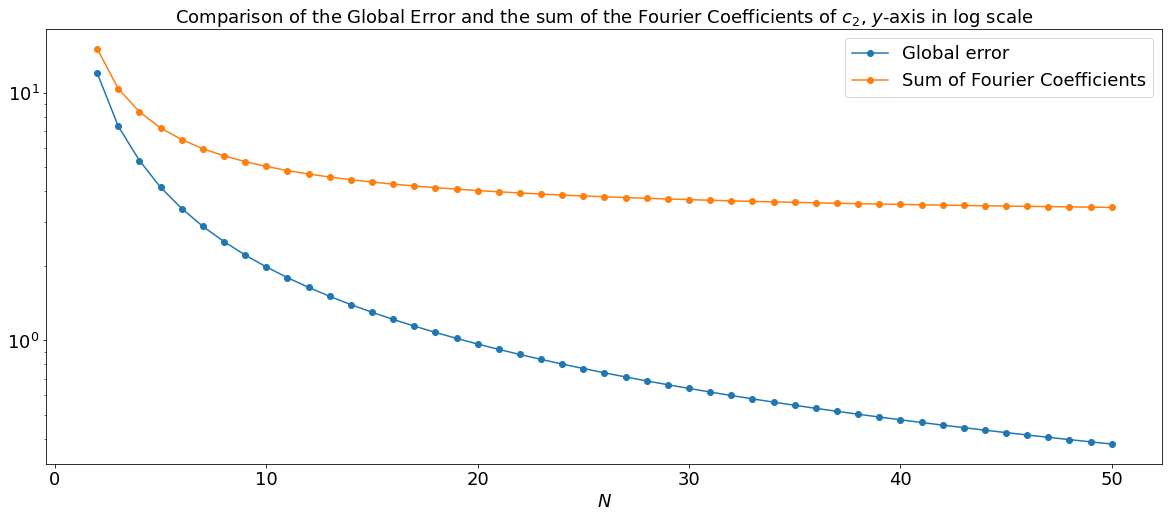

In [20]:
def c2(x): # define the function c2

    return np.abs(x**3)

Nmax = 50 # maximum index of truncation 

tabN = np.arange(0, Nmax + 1) # indices of truncation 

X = np.arange(-pi, pi, 1000) # discretization of the interval [-pi, pi]

tab_anf = CoeffsFourier(c2, int(4*Nmax) +1)[0] # compute the Fourier Coefficients of c2

tab_err = FourierErr(c2, Nmax, X) # global error of the approximation over X

tab_sum_coeffs = 2*np.array([sum(abs(tab_anf[i: int(4*Nmax)+i])) for i in range(2, Nmax+1)]) # upper bound of the global error 

#plots
plt.figure(figsize=(20, 8))

plt.plot(tabN[2:], tab_err, marker='o', label = 'Global error')
plt.plot(tabN[2:], tab_sum_coeffs, marker = 'o', label='Sum of Fourier Coefficients')
plt.legend(fontsize = 18)
plt.tick_params(labelsize=18)
plt.xlabel('$N$', fontsize = 18)
plt.tick_params(labelsize=18)
plt.legend(fontsize = 18)
plt.yscale('log')
plt.title('Comparison of the Global Error and the sum of the Fourier Coefficients of $c_2$, $y$-axis in log scale', fontsize='18')
plt.show()

<ipython-input-3-9e1eb295631e>:24: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral_1 = integrate.quad(fcosn, -pi, pi)[0] # Fourier coefficient at step n
<ipython-input-3-9e1eb295631e>:24: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integral_1 = integrate.quad(fcosn, -pi, pi)[0] # Fourier coefficient at step n


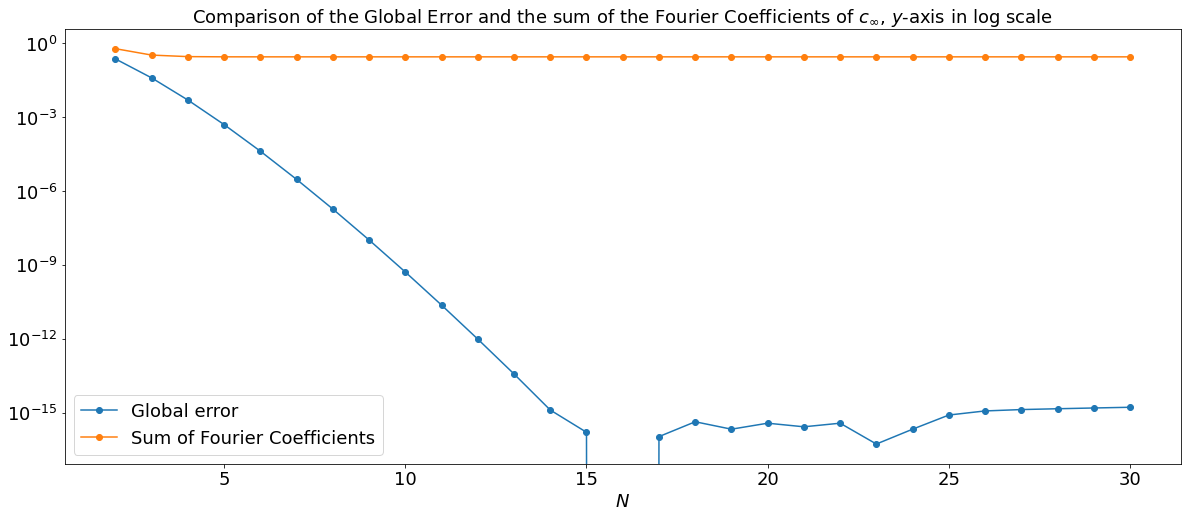

In [24]:
def cinf(x): # define the funciton c_infinity
    
    return np.exp(np.cos(x))

Nmax = 30 # maximum index of truncation 

tabN = np.arange(0, Nmax + 1) # indices of truncation 

X = np.arange(-pi, pi, 1000) # discretization of the interval [-pi, pi]

tab_anf = CoeffsFourier(cinf, 4*Nmax +1)[0] # compute the Fourier Coefficients of c2

tab_err = FourierErr(cinf, Nmax, X) # global error of the approximation over X

tab_sum_coeffs = 2*np.array([sum(abs(tab_anf[i: 4*Nmax+i])) for i in range(2, Nmax+1)]) # upper bound of the global error 

#plots
plt.figure(figsize=(20, 8))

plt.plot(tabN[2:], tab_err, marker='o', label = 'Global error')
plt.plot(tabN[2:], tab_sum_coeffs, marker = 'o', label='Sum of Fourier Coefficients')
plt.yscale('log')
plt.legend(fontsize = 18)
plt.tick_params(labelsize=18)
plt.xlabel('$N$', fontsize = 18)
plt.tick_params(labelsize=18)
plt.legend(fontsize = 18)
plt.title('Comparison of the Global Error and the sum of the Fourier Coefficients of $c_{\infty}$, $y$-axis in log scale', fontsize='18')

plt.show()

We observe that the sum of the Fourier coefficients provides an effective upper bound for the global error. However we see an error message when using integrate.quad() to compute the Fourier Coefficients for large values of $N$ which might indicate an inaccuracy in the computations. Finally, we notice that, for $N > 15$, the global error behaves erratically for $c_{\infty}$, probably due to rounding errors.

## Gibbs Phenomenon

As mentioned before, we can obseve relatively large overshoots in the truncated Fourier series at a function's jump discontinuity points. This is known as the Gibbs phenomenon. Furthermore, it can be proven that this overshoot does not decrease as the order $N$ of the series increases. As a result, the Fourier series will converge pointwise to the target function but not uniformly.

To be more precise this overshoot will converge to a finite limit. So, if $f$ is a piecewise continuous function with a jump discontinuity at $x_0$ then, for $N$ large enough, $S_N(f)$ will overshoot by about $a\cdot9\%$ on both ends of the discontinuity. Here, $a$ is the size of the jump, which can be written as:

$$ a = \left|\lim_{x \to x_0^+} f(x)\right| + \left|\lim_{x \to x_0^-} f(x)\right| $$

As such, the total overshoot will be around $18\%$ larger than the original jump. The exact proportion of the overshoot on one side is given by:

$$ \frac{1}{\pi}\int_0^{\pi} \frac{\sin t}{t} \, dt - \frac{1}{2} = 0.0894898...$$

This value is closely related to the Wilbraham-Gibbs constant, usually labelled $G'$ and defined as:

$$ G' = \int_0^\pi \frac{\sin x}{x} \, dx = \frac{\pi}{2} + \pi \cdot (0.0894898...) = 1.851937... $$

so that the overshoot on each side can be written as $\frac{G'}{\pi} - \frac{1}{2}$.  As such, the actual total overshoot will be two times this value.

We will test this result for the case of $g$, where we can observe that the overshoots by the truncated Fourier series are the maximum and the minimum values of the series.

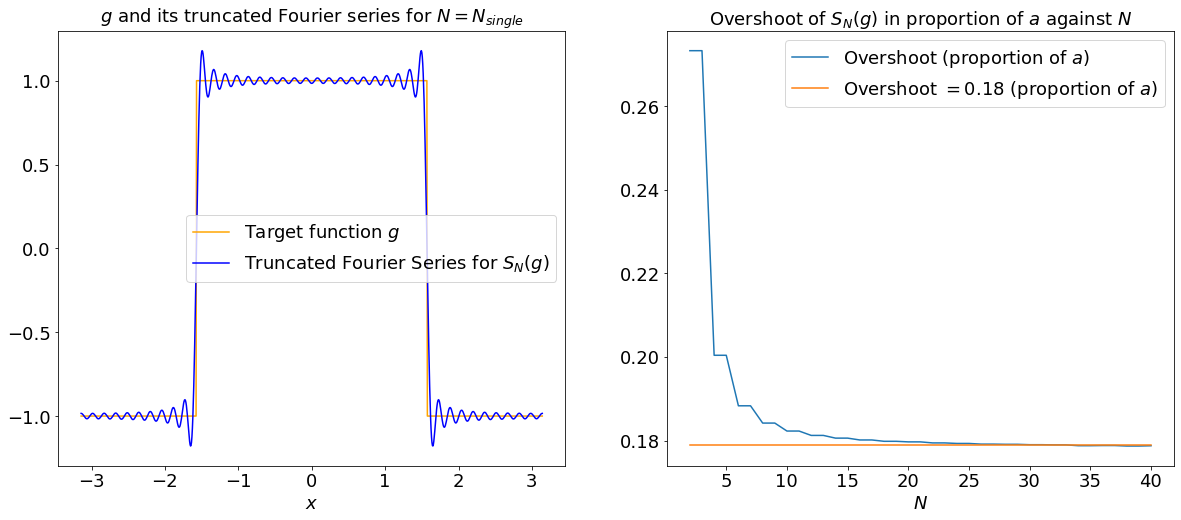

In [27]:
Nmax = 40 # maximum index of truncation, used to compute the global error

Nsingle = 40 # a fixed order of truncation, used to visualize g and its Fourier approx. at N = Nsingle

tab_N = np.arange(2, Nmax+1) # array containing the truncation indices at which we compute the Fourier approx.

X = np.linspace(-np.pi, np.pi, 1000) # discretisation of the interval of definition of g

SNg = TruncatedFourier(g, Nsingle, X) # truncated Fourier approximation of g with N = Nsingle

a = 2 # size of the jump

tab_overshoot = np.array([np.abs(max(TruncatedFourier(g, N, X))) + np.abs(min(TruncatedFourier(g, N, X))) - a\
                          for N in range(2, Nmax + 1)])/a # array containing the values of the 
                                                          # overshoot in proportion to a

tab_reference = (Nmax - 1)*[2*0.0894898] # reference value for the overshoot in proportion to a

#plots
plt.figure(figsize=(20, 8))
    
plt.subplot(121)
plt.plot(X, [g(x) for x in X], color='orange', label = 'Target function $g$')
plt.plot(X, SNg, color = 'blue', label = 'Truncated Fourier Series for $S_N(g)$')
plt.legend(fontsize = 18)
plt.xlabel('$x$', fontsize = 18)
plt.tick_params(labelsize=18)
plt.title('$g$ and its truncated Fourier series for $N = N_{single}$', fontsize = 18)

plt.subplot(122)
plt.plot(tab_N, tab_overshoot, label = 'Overshoot (proportion of $a$)')
plt.plot(tab_N, tab_reference, label = 'Overshoot $ = 0.18$ (proportion of $a$)')
plt.xlabel('$N$', fontsize = 18)
plt.tick_params(labelsize=18)
plt.legend(fontsize=18, loc='upper right')
plt.title('Overshoot of $S_N(g)$ in proportion of $a$ against $N$', fontsize = 18)
 
plt.show()

As shown in the plots above, the overshoot of $S_N(g)$ at its jump discontinuity points converges to $a \cdot 0.18$ as $N$ goes to infinity, as expected. Furthermore, we can see that the overshoot declines rapidly when $N$ is small, before settling down to the predicted limit. Additionally, for very large $N$, we observe that the overshoot goes slightly below the expected line, which is likely due to errors in the computation of $a_n(g)$ for large $n$.

As such, we can confirm that the Gibbs phenomenon presents a problem in the approximation of piecewise continuous functions via their truncated Fourier Series. While there exist solutions to deal with this issue, they are beyond the scope of our studies and therefore will not be discussed in this notebook.

# Trigonometric interpolation 

In the following section, we study a different way of approximating $2\pi$-periodic even functions by means of trigonometric interpolation given a set of nodes of the form:

$$ X_k = \frac{2k+1}{2N}\pi \quad \text{with} \quad k = 0, ..., N-1 $$

We define the interpolation polynomial as:
$$ P_{N}(f)(x) = \hat{f_0} + 2\sum_{n = 1}^{N-1} \hat{f_n}cos(nx) $$
Hence, the interpolation polynomial is fully defined by the coefficients $\hat{f}$. 
We will now study three different methods for computing these coefficients. 

The first method of determining $\hat{f}$ is to solve the system:
$$ A\hat{f} = f(X)$$
with:

$$ A = \begin{pmatrix}
        \cos(0\cdot X_0)& \ldots & 2\cos((N - 1)X_0)\\
        \vdots & 2\cos(iX_j) & \vdots\\
        \cos(0\cdot X_0) & \ldots & 2\cos((N - 1)X_{N - 1})
        \end{pmatrix}
$$

for $1 \leq i \leq N - 1$ and $0\leq j \leq N - 1$ and : 

$$ X = \begin{pmatrix} X_0 \\ \vdots\\ X_{N-1} \end{pmatrix} $$

In the cells below, we define the Python functions to compute these coefficients by this method.

In [28]:
def Nodes(N):
    """
    Inputs : 
    N: number of nodes (strictly positive integer)
    
    Output : 
    array of interpolation nodes
    """
    
    return (2*np.arange(N) + 1)*np.pi/(2*N)

In [29]:
def matrix_A(N):
    """
    Inputs : 
    N: number of nodes (strictly positive integer)
    
    Output : 
    A : matrix as defined in the above system
    """
    X = Nodes(N) # compute the interpolation nodes 
    
    A = np.array([[1]+[2*np.cos(j*X[i]) for j in range(1, N)] for i in range(N)])
    
    return A

In [30]:
def first_method(f, N):
    """
    Inputs : 
    N: number of nodes (strictly positive integer)
    
    Output : 
    f_hat: array containing the interpolation coefficients
    """
    
    X = Nodes(N) # compute the interpolation nodes
    
    A = matrix_A(N) # compute the matrix A
    
    f_hat = np.linalg.solve(A, f(X)) # solve the linear system
    
    return f_hat

We now define a function that evaluates the trigonometric interpolation polynomial over a discretization of $[-\pi, \pi]$ to allow us to plot it.

In [32]:
def evalTrig(fhat, x):
    """
    Evaluation of the trigonometric polynomial.
    -----------------------
    Inputs: 
    fhat : the coefficients of the polynomial PNf
    x : array of values at which we want to evaluate P 
    
    Output: 
    PNfx:  value of PNf(x)
    """
    N = fhat.size # number of interpolation coefficients
    
    PNfx = fhat[0] # initialize the PNx
    
    for n in range(1, N):
        
        PNfx = PNfx + 2*fhat[n]*np.cos(n*x) # compute the sum as defined above
        
    return PNfx

We now will test this method to interpolate the function $f$ we studied previously. We will plot the function and its interpolation polynomial, and then the local interpolation error at the nodes. Note that, as $X_k \geq 0$ for all $1 \leq k \leq N - 1$, we will mirror these nodes so that we may observe the behaviour of the interpolation on $[-\pi, \pi]$.

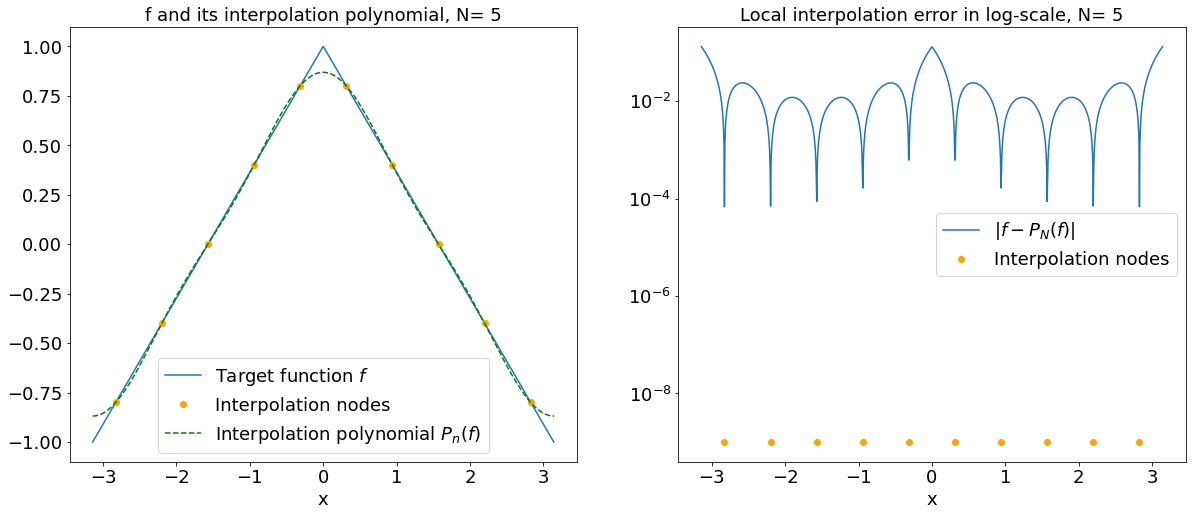

In [33]:
N = 5 # number of nodes used in the interpolation

fhat = first_method(f, N) # compute the coefficients using the first method 

interval = np.linspace(-pi , pi , 1000) # discretization of the interval [-pi, pi]

X = Nodes(N) # compute the interpolation nodes 

PNf = evalTrig(fhat, interval) # evaluation of the trigonometric polynomial over [-pi, pi]

#plot

plt.figure(figsize=(20, 8))

plt.subplot(121)
plt.plot(interval, f(interval), label = 'Target function $f$')
plt.plot(X, f(X), marker='o', linestyle='', label = 'Interpolation nodes', color='orange')
plt.plot(-X, f(-X), marker='o', linestyle='', color='orange')
plt.plot(interval, PNf, '--',label = 'Interpolation polynomial $P_n(f)$', color='green')
plt.legend(fontsize = 18)
plt.xlabel('x', fontsize = 18)
plt.tick_params(labelsize=18)
plt.title('f and its interpolation polynomial, N= %i' %N, fontsize = 18)

plt.subplot(122)
plt.plot(interval, abs(f(interval) - PNf), label = '$|f-P_N(f)|$')
plt.plot(X, 1e-9*np.ones(X.size), marker='o', linestyle='', label = 'Interpolation nodes', color='orange')
plt.plot(-X, 1e-9*np.ones(X.size), marker='o', linestyle='', color='orange')
plt.legend(fontsize = 18)
plt.xlabel('x', fontsize = 18)
plt.tick_params(labelsize=18)
plt.yscale('log')
plt.title('Local interpolation error in log-scale, N= %i' %N, fontsize = 18)

plt.show()

We can observe that $P_N(f)$ approximates $f$ fairly well even for small $N$. However, while we expect there to be essentially no local error at the interpolation nodes, this isn't the case in our plots. This is due to the fact that we evaluate $P_N(f)$ over our discretization, which does not necessarily include the interpolation nodes. Indeed, we observe that, the finer the discretization of $[-\pi, \pi]$, the smaller the local error in proximity of the interpolation nodes.

We will repeat the same test with the function $c_{\infty}(x) = e^{\cos(x)}$ to confirm these results.

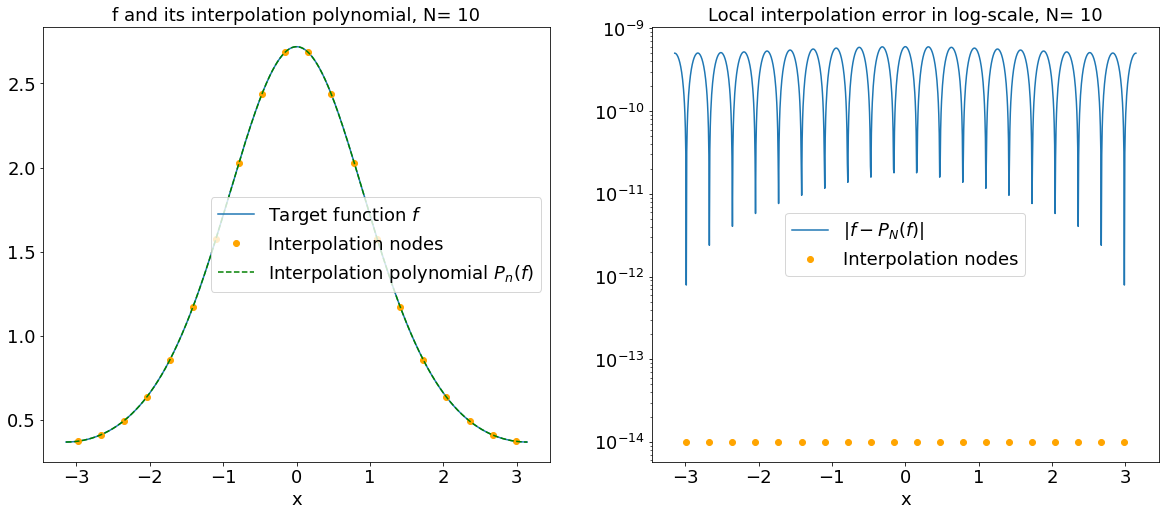

In [34]:
N = 10 # number of nodes used in the interpolation

fhat = first_method(cinf, N) # compute the coefficients using the first method 

interval = np.linspace(-pi , pi , 1000) # discretization of the interval [-pi, pi]

X = Nodes(N) # compute the interpolation nodes 

PNcinf = evalTrig(fhat, interval) # evaluation of the trigonometric polynomial over [-pi, pi]

#plots

plt.figure(figsize=(20, 8))

plt.subplot(121)
plt.plot(interval, cinf(interval), label = 'Target function $f$')
plt.plot(X, cinf(X), marker='o', linestyle='', label = 'Interpolation nodes', color='orange')
plt.plot(-X, cinf(-X), marker='o', linestyle='', color='orange')
plt.plot(interval, PNcinf, '--',label = 'Interpolation polynomial $P_n(f)$', color='green')
plt.legend(fontsize = 18)
plt.xlabel('x', fontsize = 18)
plt.tick_params(labelsize=18)
plt.title('f and its interpolation polynomial, N= %i' %N, fontsize = 18)

plt.subplot(122)
plt.plot(interval, abs(cinf(interval) - PNcinf), label = '$|f-P_N(f)|$')
plt.plot(X, 1e-14*np.ones(X.size), marker='o', linestyle='', label = 'Interpolation nodes', color='orange')
plt.plot(-X, 1e-14*np.ones(X.size), marker='o', linestyle='', color='orange')
plt.legend(fontsize = 18)
plt.xlabel('x', fontsize = 18)
plt.tick_params(labelsize=18)
plt.yscale('log')
plt.title('Local interpolation error in log-scale, N= %i' %N, fontsize = 18)

plt.show()

We can again see that the interpolation polynomial offers a very accurate approximation of the target function. In this case, we can even observe smaller local errors, and that the error decreases fairly rapidly as $N$ increases.

A second method to derive the coefficients of $P_N(f)$ is to find the inverse of matrix $A$ and then multiply it by the vector $f(X)$ to get $\hat{f}$.

The fact that A is invertible also insures that such coefficients exist and that they are unique. As mentioned in the project description, this method is also faster since matrix multiplication costs $O(N^2)$ while solving a linear system is of order $O(N^3)$

Before moving to the numerical simulations of this method we will first prove that the inverse of $A$ is:

$$B = \frac{1}{N}\begin{pmatrix}
\cos(0X_0) & \ldots & \cos(0X_{N-1}) \\
\vdots & \cos(iX_j) & \vdots \\
\cos((N-1)X_0) & \ldots & \cos((N-1)X_{N-1})
\end{pmatrix}$$

To do this, we will show that $AB = I_N$. Let $C = AB$, and write $c_{i, j}$ the coefficient in the $i$th row and $j$th column of $C$. Note that we begin indexing starting form zero. By the definition of matrix multiplication, we have that:

$$c_{i, j} = \sum_{k = 1}^{N} a_{i, n}b_{n, j}$$

Our goal is then to prove that, for all $0 \leq i \leq N - 1$:

- $\displaystyle{c_{i, j} = \frac{1}{N}\left(1 + 2\sum_{n = 1}^{N - 1} \cos(nX_i)\cos(nX_j)\right) = 0 \; \forall \, j \neq i}$


- $\displaystyle{c_{i, i} = \frac{1}{N}\left(\sum_{n = 1}^{N - 1}\cos^2(nX_i)\right) = 1}$

Firstly, observe that:

$$
\begin{align}
    Nc_{i, i} &= 1 + 2\sum_{n = 1}^{N - 1}\cos^2(nX_i) = 1 + 2\sum_{n = 1}^{N - 1}\cos^2\left(n\pi\frac{2i + 1}{2N}\right)\\
              &= 1 + \sum_{n = 1}^{N - 1}\left(1 + \cos\left(n\pi\frac{2i + 1}{N}\right)\right) = N + \sum_{n = 1}^{N - 1}\cos\left(n\pi\frac{2i + 1}{N}\right)\\
              &= N + \sum_{n = 0}^{N}\cos\left(n\pi\frac{2i + 1}{N}\right) - \cos\left(N\pi\frac{2i + 1}{N}\right) - 1 = N + \sum_{n = 0}^{N}\cos\left(n\pi\frac{2i + 1}{N}\right)
\end{align}
$$

Now, using the fact that:

$$ \sum_{n = 0}^{N}\cos\left(n\pi\frac{2i + 1}{N}\right) = \frac{1}{2} + \frac{\sin\left(\frac{2N + 1}{2}\cdot\frac{\pi(2i + 1)}{N}\right)}{2\sin\left(\frac{\pi(2i + 1)}{2N}\right)} $$

we finally obtain:

$$
Nc_{i, i} = N + \frac{1}{2} + \frac{\sin\left(\frac{2N + 1}{2}\cdot\frac{\pi(2i + 1)}{N}\right)}{2\sin\left(\frac{\pi(2i + 1)}{2N}\right)} = N + \frac{1}{2} + \frac{\sin\left(\pi + \frac{\pi(2i + 1)}{2N}\right)}{2\sin\left(\frac{\pi(2i + 1)}{2N}\right)} = N
$$

Notice that, for any $0 \leq i \leq N - 1$, $\sin\left(\frac{\pi(2i + 1)}{2N}\right) \neq 0$ as $\frac{2i + 1}{2N}$ is never an integer. Hence, we get that $c_{i, i} = 1$ as desired. Fix then $j \neq i$. It remains to show that $c_{i, j} = 0$. We have that:

$$
\begin{align}
    Nc_{i, j} &= 1 + 2\sum_{n = 1}^{N - 1} \cos(nX_i)\cos(nX_j) = 1 +  \sum_{n = 1}^{N - 1}\left(\cos(n(X_i - X_j)) + \cos(n(X_i + X_j))\right)\\
              &= 1 + \sum_{n = 1}^{N - 1}\left(\cos\left(n\pi\frac{i - j}{N}\right) + \cos\left(n\pi\frac{1 + i + j}{N}\right)\right)\\
              &= 1 + \sum_{n = 0}^{N}\left(\cos\left(n\pi\frac{i - j}{N}\right) + \cos\left(n\pi\frac{ 1 + i + j}{N}\right)\right) - 2 - \cos(\pi(i - j)) - \cos(\pi(1 + i + j))\\
              &= -\cos((i - j)\pi) - \cos(1 + i + j)\pi) + \frac{\sin\left(\frac{2N + 1}{2}\cdot\frac{\pi(i - j)}{N}\right)}{2\sin\left(\frac{\pi(i - j)}{2}\right)} + \frac{\sin\left(\frac{2N + 1}{2N}\cdot\frac{\pi(1 + i + j)}{N}\right)}{2\sin\left(\frac{\pi(1 + i + j)}{2N}\right)}
\end{align}
$$

Note once again that, for all $i \neq j$, $\sin\left(\frac{\pi(i - j)}{2N}\right) \neq 0$ and $\sin\left(\frac{\pi(1 + i + j)}{2N}\right) \neq 0$. Now observe that the parities of $i - j$ and $1 + i + j$ are always opposite. Assume, without loss of generality, that $i - j \neq 0$ is even. Then, we have that:

$$
\begin{align}
    Nc_{i, j} &= -1 + 1 + \frac{\sin\left(\pi(i - j) + \frac{\pi(i - j)}{2N}\right)}{2\sin\left(\frac{\pi(i - j)}{2N}\right)} + \frac{\sin\left(\pi(1 + i + j) + \frac{\pi(1 + i + j)}{2N}\right)}{2\sin\left(\frac{\pi(1 + i + j)}{2N}\right)}\\
              &= \frac{\sin\left(\frac{\pi(i - j)}{2N}\right)}{2\sin\left(\frac{\pi(i - j)}{2N}\right)} - \frac{\sin\left(\frac{\pi(1 + i + j)}{2N}\right)}{2\sin\left(\frac{\pi(1 + i + j)}{2N}\right)} = \frac{1}{2} - \frac{1}{2} = 0
\end{align}
$$

Note that this argument holds even when assuming that $i - j$ is odd, as in that case we would en up with $-\frac{1}{2} + \frac{1}{2} = 0$. Finally, this leads us to conclude that $c_{i, j} = 0$ and thus $C = I_N$.

We now implement this method of computing $\hat{f}$ in the cells below.

In [35]:
def matrix_B(N): 
    """
    Inputs  : 
    N: number of nodes (strictly positive integer)
    
    Output : 
    B : matrix as defined above
    """
    
    X = Nodes(N) # compute the interpolation nodes
    
    B = np.array([[np.cos(j*X[i])/N for i in range(N)] for j in range(N)])
    
    return B

In [36]:
def second_method(f, N):
    """
    Inputs  :
    N: number of nodes (strictly positive integer)
    
    Output : 
    f_hat = array containing the interpolation coefficients
    """
    B = matrix_B(N) # compute the matrix B
    
    X = Nodes(N) # compute the interpolation nodes
    
    f_hat = np.dot(B, f(X)) # perform the multiplication
    
    return f_hat

In the cell just below, one can test numerically, for various values of $N$, that $AB = I_{N}$, as expected.

In [37]:
#cell used to test that B is the inverse of A
N = 4
A = matrix_A(N)
B = matrix_B(N)
Id = np.dot(B, A)
print(Id)

[[ 1.00000000e+00  5.55111512e-17 -5.55111512e-17 -1.11022302e-16]
 [ 2.77555756e-17  1.00000000e+00  5.55111512e-17  9.37720122e-17]
 [-2.77555756e-17  5.55111512e-17  1.00000000e+00  0.00000000e+00]
 [-5.55111512e-17  9.37720122e-17  0.00000000e+00  1.00000000e+00]]


Finally, we implement a third method for computing the coefficients $\hat{f}$ using the python function dct from scipy. This method is based on the Discrete Cosine Transforms that map an array $f(X)$ to the corresponding interpolation coefficients $\hat{f}$. We expect this method to be the fastest since it doesn't introduce matrices and performs the operation with a cost of $O(N\log N)$. As mentioned in the project description the coefficients outputted by this method are actually $2N\hat{f}$, so we will divde the result by $2N$ to obtain the actual coefficients.

In [40]:
def third_method(f, N):
    """
    Inputs  : 
    N:  number of nodes (strictly positive integer)
    
    Output  : 
    f_hat: array containing the interpolation coefficients
    """
    
    X = Nodes(N) # compute the interpolation nodes 
    
    f_hat = fftpack.dct(f(X))/(2*N) # compute the coefficients using the Discrete Cosine Transforms
    
    return f_hat

In [41]:
def timed(method, f, N):
    """
    Inputs  : 
    method: chosen method to compute fhat 
    f : function to interpolate 
    N : number of nodes (strictly positive integer)
    
    Output : 
    time taken to compute the interpolation coefficients in seconds 
    """
    
    import datetime as dt
    
    start = dt.datetime.now()  # start timer
    
    coeffs = method(f, N) # compute the coefficients
    
    stop  = dt.datetime.now() # end timer
    
    return (stop - start).total_seconds() # return duration in seconds

To show that the second and third method are valid, we will compare the coefficients computed by them with the cell below.

In [43]:
N = 4 # number of interpolaton nodes

# compute the interpolation coefficients for each method

coeffs_1 = first_method(f, N)

coeffs_2 = second_method(f, N)

coeffs_3 = third_method(f, N)

print(coeffs_1)

print(coeffs_2)

print(coeffs_3)

[-2.03447843e-17  3.94290254e-01 -3.11560938e-18  2.80213456e-02]
[0.00000000e+00 3.94290254e-01 4.16333634e-17 2.80213456e-02]
[0.         0.39429025 0.         0.02802135]


As we can see, while the coefficients are not exactly equal, they are extremely close to one another. The only concerning case would be when the coefficients are not zero in some of the outputs, but we can see that they are around $10^{-17}$, and hence essentially zero.

Now that we have implemented all three methods and confirmed that they give equivalent outputs, we will compare the evolution of the running time of each against $N$. This will allow us to observe the difference in speed of execution of each method, and how it grows with $N$.

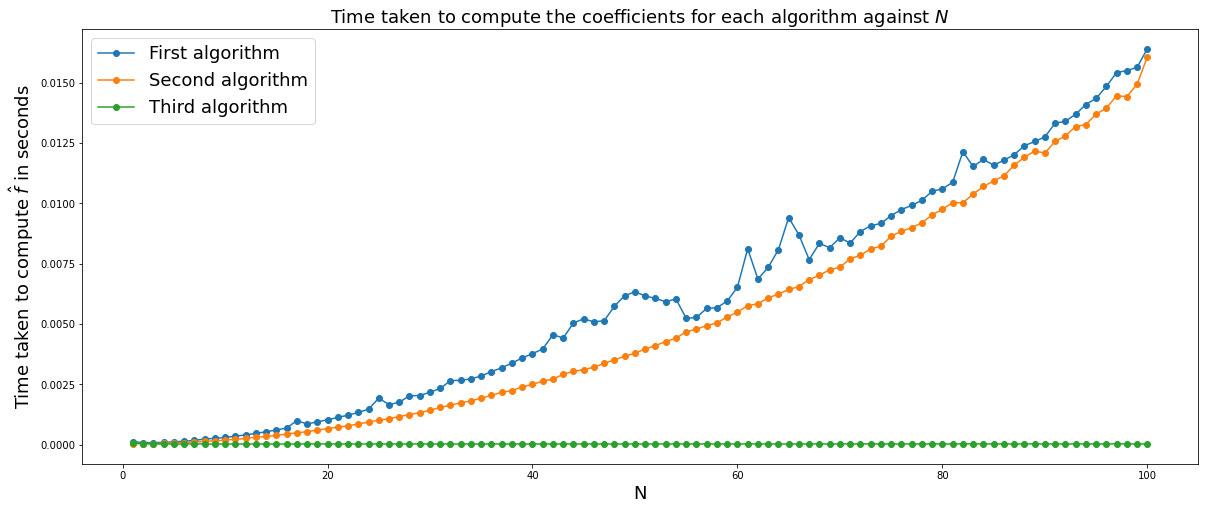

In [44]:
Nmax = 100 # maximum number of interpolation nodes

tabN = np.arange(1, Nmax+1) # number of interpolation nodes from 1 to Nmax

time_1 = np.array([timed(first_method, f, N) for N in tabN])  # time taken by first method for each N 

time_2 = np.array([timed(second_method, f, N) for N in tabN]) # time taken by second method for each N

time_3 = np.array([timed(third_method, f, N) for N in tabN])  # time taken by third method for each N

plt.figure(figsize=(20, 8))
plt.plot(tabN, time_1, marker='o', label='First algorithm')
plt.plot(tabN, time_2, marker='o', label='Second algorithm')
plt.plot(tabN, time_3, marker='o', label='Third algorithm')
plt.xlabel('N', fontsize=18)
plt.ylabel('Time taken to compute $\hat{f}$ in seconds', fontsize=18)
plt.title('Time taken to compute the coefficients for each algorithm against $N$', fontsize=18)
plt.legend(loc='upper left', fontsize=18)
plt.show()

As expected, the third algorithm performs much better than the first two. The difference in running time is so large that for the third method it seems almost instantaneous. Furthermore, we can notice that, in general, the first method is slower than the second. However, it's important to note that running the cells multiple times can lead to slightly different results, though in general they are similar. Finally, one must take into account that the running time is not only dependent on the methods, but also on the hardware being used.